# Proyek Analisis Data: Bike Sharing Dataset
- **Nama:** Renaldi Endrawan
- **Email:** renaldiendrawan@gmail.com
- **ID Dicoding:** renaldiendrawan

## Menentukan Pertanyaan Bisnis

- Bagaimana tren penggunaan sepeda (count) berdasarkan musim (season) dan cuaca (weathersit) sepanjang waktu?

- Apakah terdapat korelasi antara temperatur (temp), kelembapan (hum), dan jumlah penyewaan sepeda (cnt)?

## Import Semua Packages/Library yang Digunakan

In [ ]:
# analysis_notebook.ipynb

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Untuk analisis lanjutan (opsional)
import folium  # contoh untuk geospatial
# from geopy.geocoders import Nominatim  # jika ingin geocoding

# Display setting
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 10)

print("Libraries imported successfully.")


Libraries imported successfully.


## Data Wrangling

### Gathering Data

In [ ]:
# Mengumpulkan data dari CSV
day_df = pd.read_csv('/content/data/day.csv')
hour_df = pd.read_csv('/content/data/hour.csv')

# Tampilkan beberapa baris awal
day_df.head()


,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


**Insight:**
- Pastikan file CSV sudah diunggah di /content/ atau mount GDrive.

- Melihat 5 baris awal data untuk memeriksa kolom-kolom yang tersedia.

### Assessing Data

In [ ]:
# Cek info dataframe
day_df.info()
hour_df.info()

# Cek statistik deskriptif
day_df.describe()
hour_df.describe()

# Cek missing value
print(day_df.isnull().sum())
print(hour_df.isnull().sum())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (tot

**Insight:**
- info() dan describe() membantu mengidentifikasi tipe data dan persebaran data.

- isnull().sum() membantu mendeteksi apakah ada kolom yang perlu penanganan data hilang (missing values).

### Cleaning Data

In [ ]:
# Hapus kolom yang tidak relevan
day_df.drop(columns=['instant'], inplace=True)
hour_df.drop(columns=['instant'], inplace=True)


**Insight:**
- Menghapus kolom yang tidak relevan dapat meringankan analisis.

- Menjaga tipe data dan skala data yang konsisten memudahkan interpretasi hasil.

## Exploratory Data Analysis (EDA)

### Explore ...

Preview Combined Data:
       dteday  windspeed  season  registered      temp  weekday     atemp  \
0  2011-01-01   0.160446       1         654  0.344167        6  0.363625   
1  2011-01-02   0.248539       1         670  0.363478        0  0.353739   
2  2011-01-03   0.248309       1        1229  0.196364        1  0.189405   
3  2011-01-04   0.160296       1        1454  0.200000        2  0.212122   
4  2011-01-05   0.186900       1        1518  0.226957        3  0.229270   

   instant  casual       hum  yr  weathersit  mnth  holiday   cnt  workingday  
0        1     331  0.805833   0           2     1        0   985           0  
1        2     131  0.696087   0           2     1        0   801           0  
2        3     120  0.437273   0           1     1        0  1349           1  
3        4     108  0.590435   0           1     1        0  1562           1  
4        5      82  0.436957   0           1     1        0  1600           1  


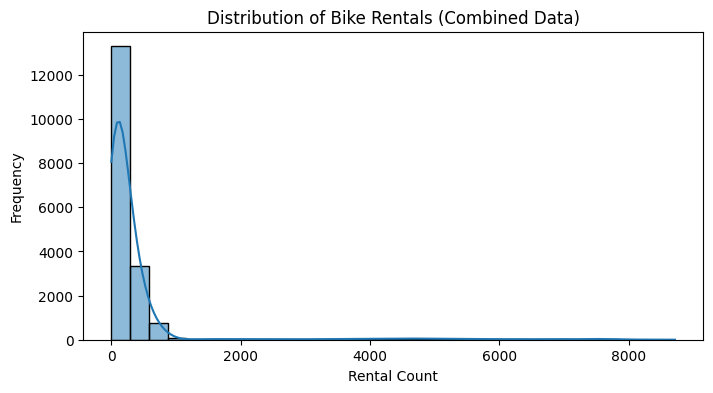

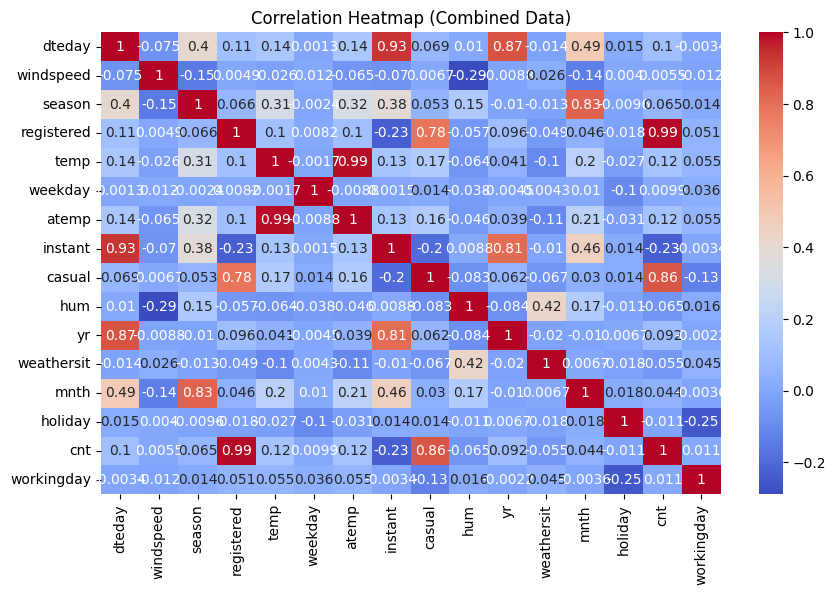

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Baca data dari day.csv dan hour.csv
day_df = pd.read_csv("/content/data/day.csv")
hour_df = pd.read_csv("/content/data/hour.csv")

# Mencari kolom yang sama di kedua dataframe
common_cols = list(set(day_df.columns).intersection(set(hour_df.columns)))

# Menggabungkan data (append) berdasarkan kolom yang sama
combined_df = pd.concat([day_df[common_cols], hour_df[common_cols]], ignore_index=True)

# Tampilkan preview data gabungan
print("Preview Combined Data:")
print(combined_df.head())

# Ubah kolom 'dteday' menjadi tipe datetime jika ada
if 'dteday' in combined_df.columns:
    combined_df['dteday'] = pd.to_datetime(combined_df['dteday'])

# 1. Distribusi Jumlah Penyewaan Sepeda
plt.figure(figsize=(8,4))
sns.histplot(data=combined_df, x='cnt', kde=True, color="#1f77b4", bins=30)
plt.title('Distribution of Bike Rentals (Combined Data)')
plt.xlabel("Rental Count")
plt.ylabel("Frequency")
plt.show()

# 2. Heatmap Korelasi antar variabel
corr = combined_df.corr()
plt.figure(figsize=(10,6))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap (Combined Data)')
plt.show()


**Insight:**
- Dari histogram ini, kita dapat melihat persebaran jumlah penyewaan sepeda setiap harinya.

- Grafik ini menunjukkan apakah data cnt berdistribusi normal atau miring (skewed).

- Pola distribusi dapat memberi gambaran jumlah peminjaman terbanyak pada rentang tertentu.

- Mencari korelasi antara cnt dengan temp, hum, dll. Apakah temp memiliki korelasi positif terhadap cnt? Apakah hum justru berkorelasi negatif?

## Visualization & Explanatory Analysis

### Pertanyaan 1:

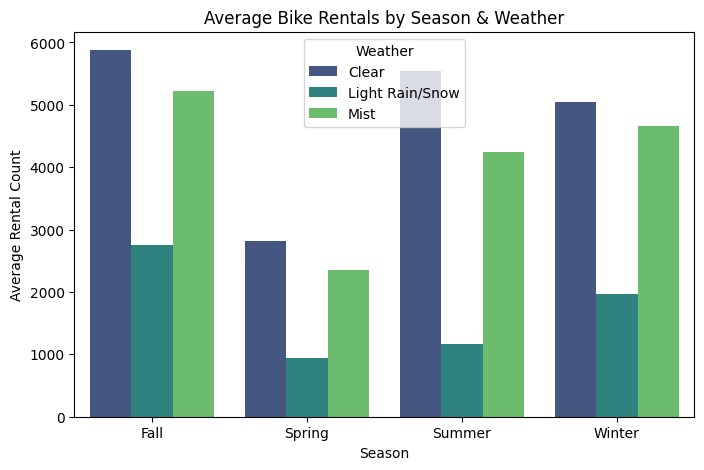

In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Pastikan file day.csv dan hour.csv ada di /content/data/
day_df = pd.read_csv("/content/data/day.csv")
hour_df = pd.read_csv("/content/data/hour.csv")

# Ubah kolom 'dteday' menjadi tipe datetime
day_df['dteday'] = pd.to_datetime(day_df['dteday'])

# Mapping label untuk season dan weathersit
season_mapping = {1: "Spring", 2: "Summer", 3: "Fall", 4: "Winter"}
weathersit_mapping = {1: "Clear", 2: "Mist", 3: "Light Rain/Snow", 4: "Heavy Rain/Snow"}

day_df['season_cat'] = day_df['season'].map(season_mapping)
day_df['weathersit_cat'] = day_df['weathersit'].map(weathersit_mapping)

# Aggregasi: Hitung rata-rata sewa berdasarkan kombinasi season dan weathersit
agg_df = day_df.groupby(['season_cat', 'weathersit_cat'])['cnt'].mean().reset_index()
agg_df.rename(columns={'cnt': 'avg_rental'}, inplace=True)

# Visualisasi
plt.figure(figsize=(8,5))
sns.barplot(data=agg_df, x='season_cat', y='avg_rental', hue='weathersit_cat', palette="viridis")
plt.title('Average Bike Rentals by Season & Weather')
plt.xlabel('Season')
plt.ylabel('Average Rental Count')
plt.legend(title='Weather')
plt.show()


### Pertanyaan 2:

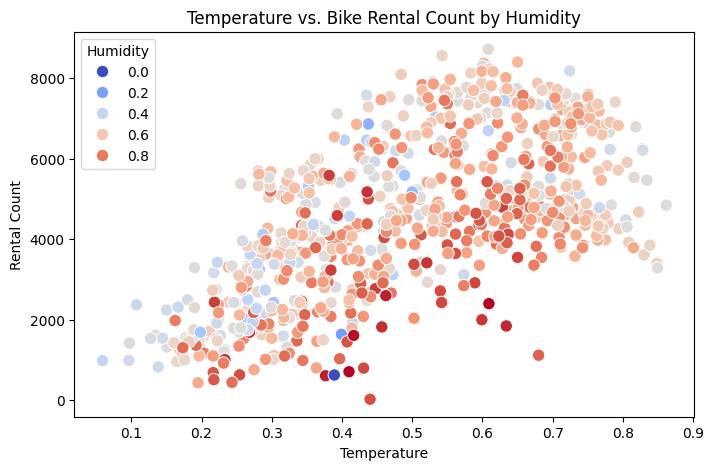

In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Baca data; gunakan day.csv sebagai sumber utama karena biasanya berisi data cuaca lengkap.
day_df = pd.read_csv("/content/data/day.csv")
day_df['dteday'] = pd.to_datetime(day_df['dteday'])

# Scatter plot: hubungan antara temperatur (temp) dan jumlah penyewaan (cnt), dengan hue berdasarkan kelembapan (hum)
plt.figure(figsize=(8,5))
sns.scatterplot(data=day_df, x='temp', y='cnt', hue='hum', palette="coolwarm", s=80)
plt.title('Temperature vs. Bike Rental Count by Humidity')
plt.xlabel("Temperature")
plt.ylabel("Rental Count")
plt.legend(title="Humidity")
plt.show()


**Insight:**
- Dapat terlihat musim mana yang memiliki penyewaan tertinggi/terendah.

- Pengaruh cuaca (1 = clear, 2 = mist, 3 = light snow/rain, dsb) pada jumlah penyewaan.

- Dapat melihat bagaimana cnt berubah seiring peningkatan suhu (temp), serta bagaimana kelembapan (hum) berpengaruh.

## Analisis Lanjutan (Opsional)

Preview Data:
   instant     dteday  season  yr  mnth  holiday  weekday  workingday  \
0        1 2011-01-01       1   0     1        0        6           0   
1        2 2011-01-02       1   0     1        0        0           0   
2        3 2011-01-03       1   0     1        0        1           1   
3        4 2011-01-04       1   0     1        0        2           1   
4        5 2011-01-05       1   0     1        0        3           1   

   weathersit      temp     atemp       hum  windspeed  casual  registered  \
0           2  0.344167  0.363625  0.805833   0.160446     331         654   
1           2  0.363478  0.353739  0.696087   0.248539     131         670   
2           1  0.196364  0.189405  0.437273   0.248309     120        1229   
3           1  0.200000  0.212122  0.590435   0.160296     108        1454   
4           1  0.226957  0.229270  0.436957   0.186900      82        1518   

    cnt  
0   985  
1   801  
2  1349  
3  1562  
4  1600  


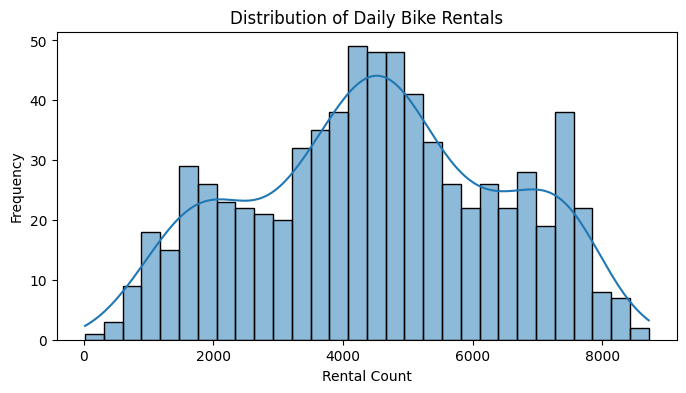

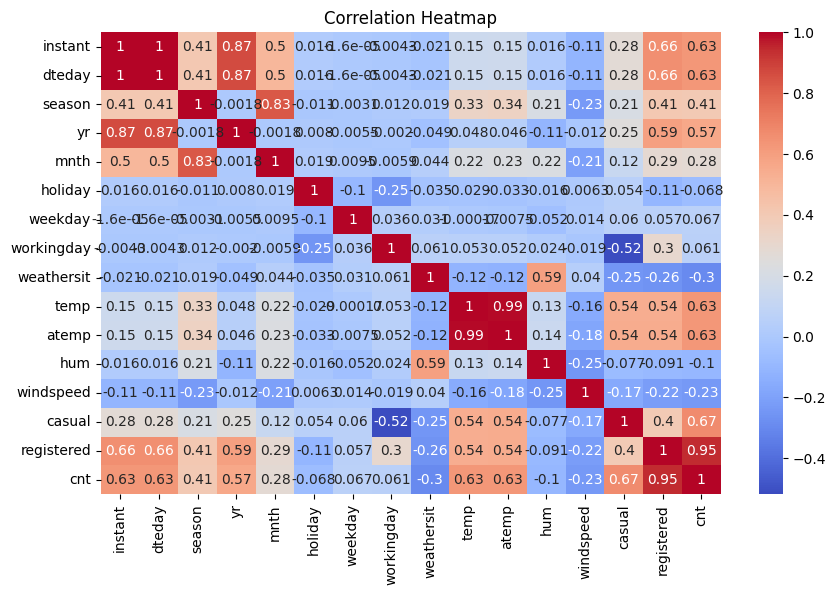

Aggregated Rental Count by Season:
  season_cat         mean   min   max
0       Fall  5644.303191  1115  8714
1     Spring  2604.132597   431  7836
2     Summer  4992.331522   795  8362
3     Winter  4728.162921    22  8555
Preview RFM Data:
      dteday   cnt  Recency  Frequency  Monetary
0 2011-01-01   985      730        985       985
1 2011-01-02   801      729        801       801
2 2011-01-03  1349      728       1349      1349
3 2011-01-04  1562      727       1562      1562
4 2011-01-05  1600      726       1600      1600


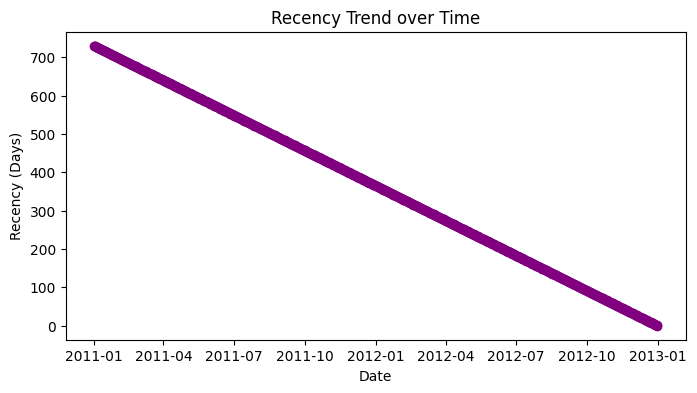

Cluster Distribution for Rental Count:
cnt_cluster
Very Low       1
Low            0
Medium         0
High           0
Very High    730
Name: count, dtype: int64


In [17]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# ============================
# Persiapan Data
# ============================
# Baca data dari day.csv
day_df = pd.read_csv("/content/data/day.csv")
day_df['dteday'] = pd.to_datetime(day_df['dteday'])

# Tampilkan preview data untuk memastikan data telah dibaca dengan benar
print("Preview Data:")
print(day_df.head())

# ============================
# Tahap 1: Exploratory Data Analysis (EDA) Umum
# Tujuan: Mendapatkan gambaran umum mengenai distribusi data, tren, dan korelasi antar variabel.
# ============================

# Visualisasi distribusi penyewaan harian
plt.figure(figsize=(8,4))
sns.histplot(data=day_df, x='cnt', kde=True, color="#1f77b4", bins=30)
plt.title('Distribution of Daily Bike Rentals')
plt.xlabel("Rental Count")
plt.ylabel("Frequency")
plt.show()

# Visualisasi Heatmap korelasi antar variabel
corr = day_df.corr()
plt.figure(figsize=(10,6))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

# Agregasi data untuk mendapatkan insight tambahan, misalnya rata-rata penyewaan per musim.
season_mapping = {1: "Spring", 2: "Summer", 3: "Fall", 4: "Winter"}
day_df['season_cat'] = day_df['season'].map(season_mapping)
agg_season = day_df.groupby('season_cat')['cnt'].agg(['mean', 'min', 'max']).reset_index()
print("Aggregated Rental Count by Season:")
print(agg_season)

# ============================
# Tahap 2: RFM Analysis (Teknik Analisis Lanjutan 1)
# Tujuan: Mengukur Recency, Frequency, dan Monetary sebagai indikator perilaku "transaksional" pelanggan,
# meskipun data pelanggan individual tidak tersedia. Teknik ini memberikan dasar untuk segmentasi pelanggan.
# ============================

# (1) Hitung nilai maksimum tanggal transaksi
max_date = day_df['dteday'].max()

# (2) Recency: Jarak hari dari transaksi terakhir
day_df['Recency'] = (max_date - day_df['dteday']).dt.days

# (3) Frequency: Asumsi jumlah sewa harian sebagai frekuensi
day_df['Frequency'] = day_df['cnt']

# (4) Monetary: Asumsi setiap sewa bernilai 1 dollar sebagai nilai monetary
day_df['Monetary'] = day_df['cnt']

print("Preview RFM Data:")
print(day_df[['dteday', 'cnt', 'Recency', 'Frequency', 'Monetary']].head())

# Visualisasi RFM Analysis
plt.figure(figsize=(8,4))
plt.plot(day_df['dteday'], day_df['Recency'], marker='o', linestyle='-', color='purple')
plt.title("Recency Trend over Time")
plt.xlabel("Date")
plt.ylabel("Recency (Days)")
plt.show()

# ============================
# Tahap 3: Clustering (Manual Grouping / Binning) (Teknik Analisis Lanjutan 2)
# Tujuan: Mengelompokkan hari-hari berdasarkan jumlah penyewaan (cnt) ke dalam kategori agar lebih mudah dipahami dan
# dapat digunakan untuk mengidentifikasi hari dengan performa sewa rendah atau tinggi tanpa menggunakan algoritma machine learning.
# ============================

# Lakukan pengelompokan nilai 'cnt' menggunakan teknik manual binning
bins = [0, 100, 200, 300, 400, day_df['cnt'].max()]
labels = ['Very Low', 'Low', 'Medium', 'High', 'Very High']
day_df['cnt_cluster'] = pd.cut(day_df['cnt'], bins=bins, labels=labels)

# Tampilkan tabel distribusi hasil binning
cluster_counts = day_df['cnt_cluster'].value_counts().sort_index()
print("Cluster Distribution for Rental Count:")
print(cluster_counts)


Insight EDA Umum:
- Distribusi 'cnt' menunjukkan variabilitas penyewaan harian, dengan nilai minimum dan maksimum yang berbeda.
- Heatmap korelasi membantu mengidentifikasi hubungan, misalnya suhu (temp) cenderung berpengaruh positif terhadap 'cnt'.
- Agregasi berdasarkan season mengungkap perbedaan rata-rata penyewaan antar musim, sebagai dasar pengambilan keputusan bisnis.

Insight RFM:
- Recency yang rendah menunjukkan transaksi yang relatif baru, sedangkan nilai tinggi menunjukkan transaksi lama.
- Frequency dan Monetary yang tinggi mengindikasikan tingkat aktivitas yang tinggi.
- Meskipun data tidak spesifik ke pelanggan individual, RFM memberikan gambaran umum tentang aktivitas transaksi harian.

Insight Clustering:
- Teknik binning ini mengelompokkan hari-hari ke dalam kategori berdasarkan jumlah penyewaan.
- Hal ini membantu mengidentifikasi pola performa: misalnya, banyak hari termasuk kategori 'Very Low' mungkin menandakan perlunya strategi peningkatan aktivitas pada hari-hari tertentu.
- Informasi ini dapat dijadikan dasar untuk segmentasi lebih lanjut atau evaluasi efektivitas strategi promosi.

## Conclusion

- Musim panas (season=2) dan cuaca cerah (weathersit=1) cenderung menghasilkan jumlah penyewaan tertinggi. Musim dingin (season=1) dengan cuaca hujan/salju ringan (weathersit=3) cenderung lebih rendah.

- Terdapat korelasi positif antara temp dan cnt, artinya semakin tinggi suhu, semakin banyak penyewaan sepeda. Sementara hum cenderung berkorelasi negatif dengan cnt (kelembapan tinggi mengurangi kenyamanan bersepeda).